In [1]:
from pathlib import Path
from dataclasses import dataclass, asdict
from typing import Any, Literal

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import magnetopy as mp

DATA_PATH = Path("../../tests/data/")

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Field (T)', ylabel='Magnetization ($N_A \\cdot \\mu_B$)'>)

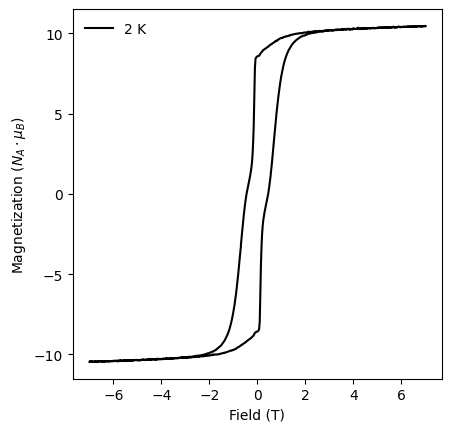

In [2]:
dset1 = mp.Magnetometry(DATA_PATH / "dataset1")
mvsh = dset1.get_mvsh(2)
mvsh.plot()

(-15000.0, 15000.0)

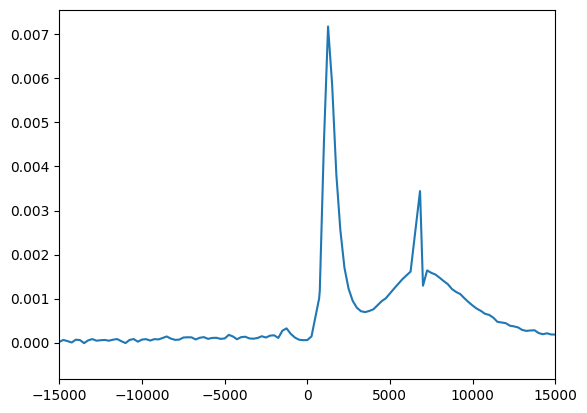

In [3]:
df = mvsh.simplified_data("forward").copy()
df['dmdh'] = np.gradient(df['moment'], df['field'])

fig, ax = plt.subplots()
ax.plot(df['field'][2:-2], df['dmdh'][2:-2])
ax.set_xlim(-15000, 15000)

In [6]:
fitting_args = mp.CauchyFittingArgs(
    [
        mp.CauchyParams(
            m_s = (0.007, 0, 10),
            h_c = (0, -5000, 5000),
            gamma = (1000, 0, 10000)
        ),
        mp.CauchyParams(
            m_s = (0.007, 0, 10),
            h_c = (7500, 5000, 10000),
            gamma = (1000, 0, 10000)
        ), 
    ]
)

results = mp.fit_cauchy_pdf(df['field'][2:-2], df['dmdh'][2:-2], fitting_args)
results.as_dict()

{'terms': [{'m_s': 3.8930947658632946,
   'm_s_err': 0.0842493602372718,
   'h_c': 1356.8112208132807,
   'h_c_err': 6.622473304192949,
   'gamma': 1361.3025941760059,
   'gamma_err': 41.22045198751275},
  {'m_s': 6.903060876140998,
   'm_s_err': 0.22937952743607856,
   'h_c': 6977.458319660302,
   'h_c_err': 62.58208223572287,
   'gamma': 8549.161901726777,
   'gamma_err': 376.03727316755715}],
 'chi_pd': 6.666768504479095e-06,
 'chi_pd_err': 7.09307263248521e-06,
 'chi_squared': 1.276517277492587e-05,
 'reduced_chi_squared': 2.3125312998054115e-08,
 'm_s_unit': 'unknown',
 'h_c_unit': 'unknown',
 'gamma_unit': 'unknown',
 'chi_pd_unit': 'unknown',
 '_class_': 'CauchyAnalysisResults'}

In [8]:
x_range = (df['field'].min(), df['field'].max())
y_max = df['dmdh'].max()
df['sim'] = mp.cauchy_pdf(df['field'], fitting_args.build_params(x_range, y_max))

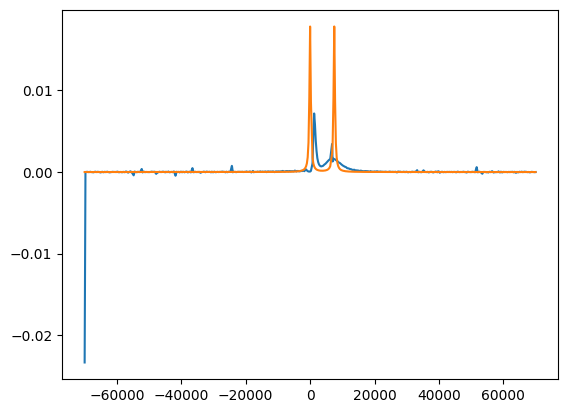

In [11]:
fig, ax = plt.subplots()
ax.plot(df['field'], df['dmdh'])
ax.plot(df['field'], 1000*df['sim'])
# ax.set_xlim(-15000, 15000)